<a href="https://colab.research.google.com/github/ABDULRAFAY757/ABDULRAFAY757/blob/main/Food_and_feed_production_and_the_enviroment_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import os
pd.set_option("display.max_columns", None)
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
na_vals=["NA", "Missing", "NaN", "None"]
df_FAO= pd.read_csv("/content/FAO.csv",encoding= "latin1", na_values=na_vals)
df_Food_Production= pd.read_csv("/content/Food_Production.csv")

In [3]:
df_FAO.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
df_FAO.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,18062.000000,18062.000000,20490.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,225.988962,230.419222,238.415487,244.340952,250.262237,254.238655,257.454677,267.323336,267.126547,274.443528,276.573364,285.963095,299.790166,305.835099,305.666072,311.656428,320.981157,326.911473,339.557866,344.345468,351.743227,361.941800,363.976363,372.351656,375.418115,379.449950,386.007760,389.309370,397.079607,404.490822,415.261922,421.623053,428.878505,441.677019,451.771819,458.723826,465.458964,472.693298,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,2100.228354,2132.244717,2189.166883,2266.964627,2322.967733,2372.627182,2421.964322,2528.042608,2365.411987,2464.376834,2427.373749,2555.249955,2757.473984,2768.374398,2730.433908,2774.265032,2931.209478,3002.929914,3101.632149,3094.241689,3231.480597,3312.098595,3236.741120,3349.602911,3422.824069,3453.922037,3509.290447,3555.648726,3714.324984,3754.281929,3962.388448,4036.101905,4149.057052,4340.531660,4649.579544,4751.597094,4868.625666,4911.216237,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6

In [5]:
df_FAO.drop(columns=["Area Abbreviation","Area Code","Item Code","Element Code","latitude","longitude"], inplace=True)

In [6]:
cat_cols = df_FAO.select_dtypes(["object"]).columns
print("Count of categorical variables is",cat_cols.value_counts().sum())
num_cols = df_FAO.select_dtypes(["float64","int64"]).columns
print("Count of numerical variables is",num_cols.value_counts().sum())
df_FAO.info()

Count of categorical variables is 4
Count of numerical variables is 53
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     21477 non-null  object 
 1   Item     21477 non-null  object 
 2   Element  21477 non-null  object 
 3   Unit     21477 non-null  object 
 4   Y1961    17938 non-null  float64
 5   Y1962    17938 non-null  float64
 6   Y1963    17938 non-null  float64
 7   Y1964    17938 non-null  float64
 8   Y1965    17938 non-null  float64
 9   Y1966    17938 non-null  float64
 10  Y1967    17938 non-null  float64
 11  Y1968    17938 non-null  float64
 12  Y1969    17938 non-null  float64
 13  Y1970    17938 non-null  float64
 14  Y1971    17938 non-null  float64
 15  Y1972    17938 non-null  float64
 16  Y1973    17938 non-null  float64
 17  Y1974    17938 non-null  float64
 18  Y1975    17938 non-null  float64
 19  Y1976    17938 no

In [7]:
df_FAO["Y2012"] = df_FAO["Y2012"].astype(float)
df_FAO["Y2013"] = df_FAO["Y2013"].astype(float)

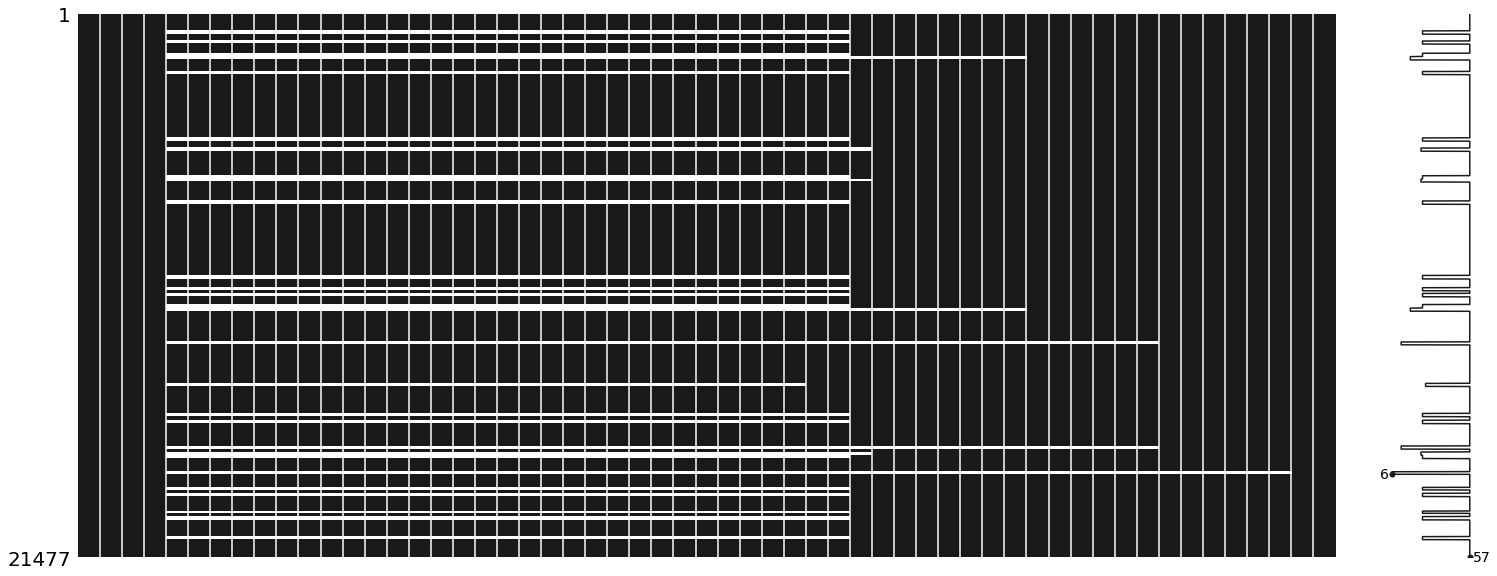

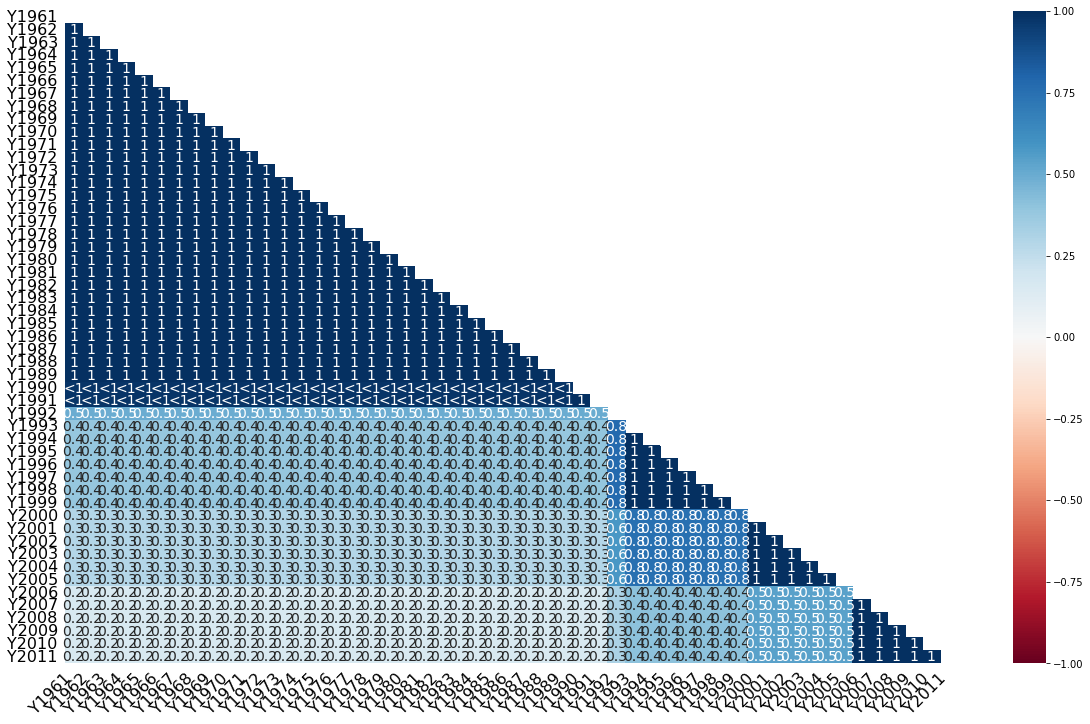

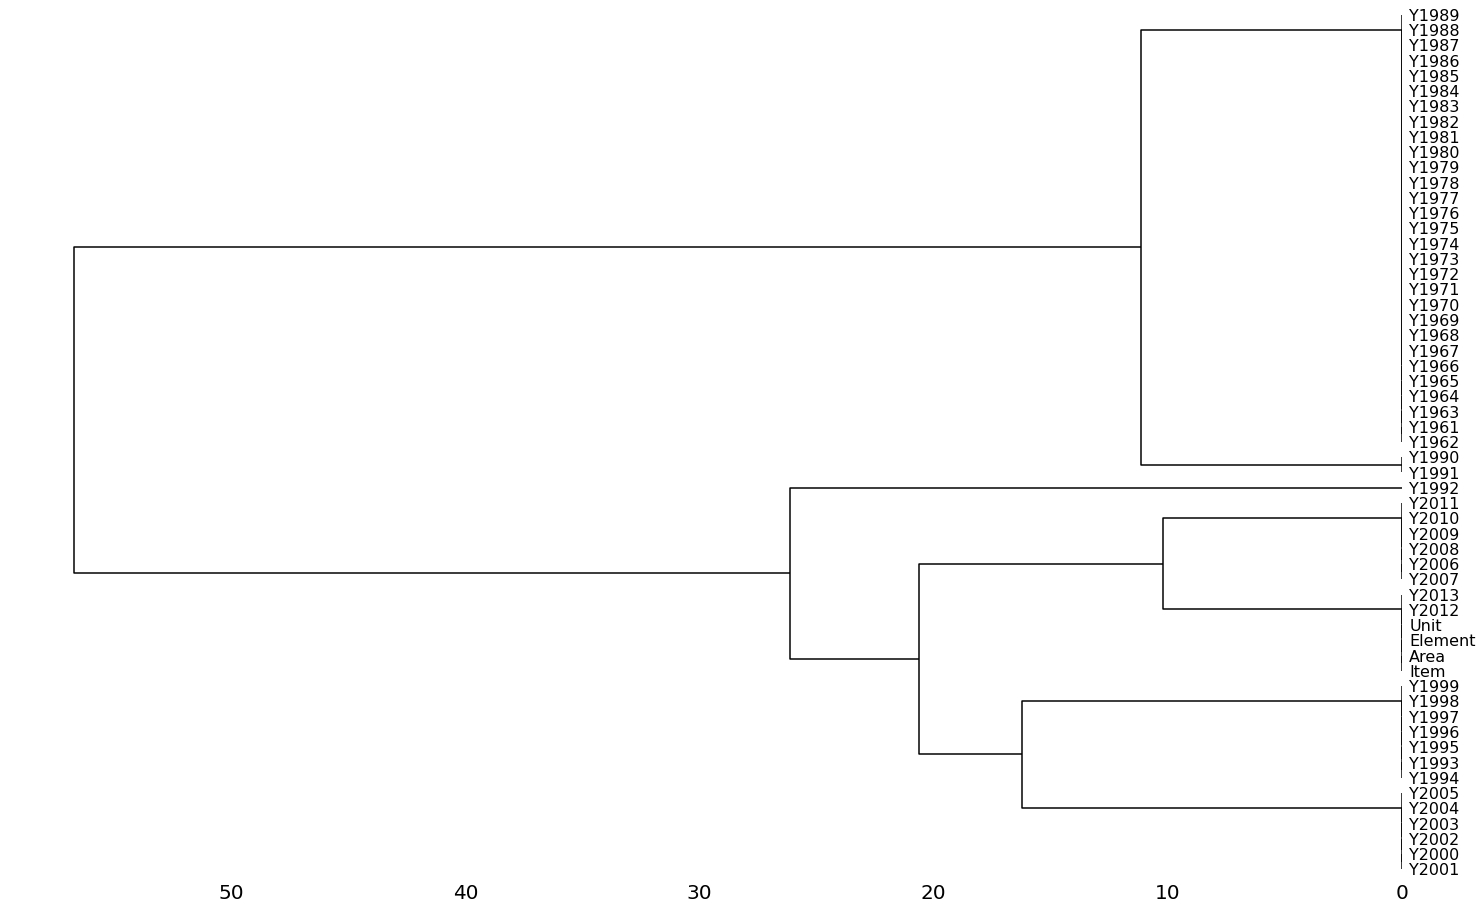

In [8]:
msno.matrix(df_FAO, color=" 0.1")
msno.heatmap(df_FAO)
msno.dendrogram(df_FAO)

In [10]:
print("Total number of missing values per year")
print("YEAR  MISSING VALUES")
print (df_FAO.loc[:, "Y1961":"Y2013"].isna().sum())

Total number of missing values per year
YEAR  MISSING VALUES
Y1961    3539
Y1962    3539
Y1963    3539
Y1964    3539
Y1965    3539
Y1966    3539
Y1967    3539
Y1968    3539
Y1969    3539
Y1970    3539
Y1971    3539
Y1972    3539
Y1973    3539
Y1974    3539
Y1975    3539
Y1976    3539
Y1977    3539
Y1978    3539
Y1979    3539
Y1980    3539
Y1981    3539
Y1982    3539
Y1983    3539
Y1984    3539
Y1985    3539
Y1986    3539
Y1987    3539
Y1988    3539
Y1989    3539
Y1990    3415
Y1991    3415
Y1992     987
Y1993     612
Y1994     612
Y1995     612
Y1996     612
Y1997     612
Y1998     612
Y1999     612
Y2000     349
Y2001     349
Y2002     349
Y2003     349
Y2004     349
Y2005     349
Y2006     104
Y2007     104
Y2008     104
Y2009     104
Y2010     104
Y2011     104
Y2012       0
Y2013       0
dtype: int64


In [11]:
df_FAO1 = df_FAO[df_FAO.isna().any(axis=1)]
df_FAO1.head()

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
679,Armenia,Wheat and products,Feed,1000 tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,21.0,24.0,25.0,10.0,32.0,58.0,55.0,78.0,20.0,20.0,42.0,69.0,59.0,46.0,67.0,57.0,56.0,61.0,65.0,92.0,93.0
680,Armenia,Wheat and products,Food,1000 tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539.0,544.0,476.0,497.0,455.0,503.0,495.0,489.0,481.0,461.0,429.0,443.0,490.0,433.0,445.0,412.0,428.0,391.0,372.0,386.0,377.0,389.0
681,Armenia,Rice (Milled Equivalent),Feed,1000 tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,Armenia,Rice (Milled Equivalent),Food,1000 tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,19.0,17.0,10.0,10.0,7.0,11.0,10.0,10.0,9.0,13.0,12.0,11.0,14.0,17.0,15.0,13.0,13.0,11.0,9.0,9.0,9.0
683,Armenia,Barley and products,Feed,1000 tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,63.0,58.0,61.0,79.0,31.0,48.0,46.0,15.0,65.0,40.0,53.0,68.0,57.0,33.0,86.0,76.0,102.0,86.0,124.0,121.0,137.0


In [12]:
values_per_area = df_FAO.pivot_table(index=["Area"], aggfunc="size")
df_missing_area = df_FAO1.pivot_table(index=["Area"], aggfunc="size")
print("Total number of missing values for Area")
df_missing_area

Total number of missing values for Area


Area
Armenia                                      133
Azerbaijan                                   124
Belarus                                      131
Belgium                                      136
Bosnia and Herzegovina                       124
Croatia                                      129
Czechia                                      129
Estonia                                      135
Ethiopia                                     116
Georgia                                      133
Kazakhstan                                   141
Kyrgyzstan                                   124
Latvia                                       136
Lithuania                                    140
Luxembourg                                   127
Montenegro                                   118
Oman                                         124
Republic of Moldova                          130
Russian Federation                           137
Serbia                                       127
Slovakia       

In [13]:
df_FAO= df_FAO.fillna("0") # sostitution of NaN values with zero
df_FAO_lastyears = df_FAO.drop(df_FAO.loc[:, "Y1961":"Y1992"], axis = 1)

In [14]:
year_list = list(df_FAO_lastyears.iloc[:,4:].columns)
area_list = list(df_FAO_lastyears["Area"].unique())
df_area = df_FAO_lastyears.groupby("Area")[year_list].apply(lambda x : x.sum()) #for each country sum over years for Food&Feed
#add two columns, Sum_produce e Rank in order to make ranking
df_area["Sum_Produce_byarea"] = df_area.agg("sum", axis="columns")
df_area["Rank"] = df_area["Sum_Produce_byarea"].rank(ascending=False)
df_area.sort_values(by="Rank",inplace=True) #ranking order
df_area.head(8)

,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum_Produce_byarea,Rank
Area,,,,,,,,,,,,,,,,,,,,,,,
"China, mainland",1522331.0,1605487.0,1718202.0,1816327.0,1851318.0,1919109.0,2008790.0,2164099.0,2219943.0,2300071.0,2314540.0,2374847.0,2432309.0,2439722.0,2527905.0,2653346.0,2744815.0,2865116.0,2994756.0,3108577.0,3191155.0,48772765.0,1.0
India,758811.0,780455.0,808109.0,823412.0,856044.0,907653.0,949204.0,934346.0,951943.0,932637.0,964933.0,958430.0,988532.0,1056344.0,1120149.0,1164815.0,1166783.0,1226850.0,1267739.0,1295189.0,1336593.0,21248971.0,2.0
United States of America,850575.0,913340.0,851713.0,906255.0,910904.0,921577.0,939541.0,964963.0,951203.0,937972.0,962709.0,997495.0,982124.0,948891.0,965464.0,936095.0,929625.0,909478.0,892416.0,910537.0,938639.0,19521516.0,3.0
Brazil,269658.0,285793.0,310646.0,296138.0,304748.0,301059.0,311399.0,332274.0,322017.0,333042.0,335122.0,353635.0,357158.0,376499.0,384071.0,423546.0,410338.0,429110.0,449439.0,439247.0,439967.0,7464906.0,4.0
Russian Federation,409393.0,353898.0,338005.0,320115.0,335851.0,294507.0,293114.0,310241.0,346387.0,328948.0,337315.0,358233.0,357155.0,366983.0,352277.0,391224.0,357694.0,324189.0,377675.0,347165.0,370913.0,7271282.0,5.0
Nigeria,163872.0,168625.0,174843.0,177779.0,183924.0,191588.0,195305.0,199382.0,201770.0,215594.0,223755.0,238685.0,248917.0,264276.0,260195.0,268276.0,257785.0,275614.0,295836.0,297791.0,300923.0,4804735.0,6.0
Germany,205382.0,206518.0,207780.0,211402.0,205932.0,209584.0,206727.0,217063.0,213744.0,219432.0,209830.0,215978.0,217398.0,217313.0,215849.0,221273.0,222413.0,210659.0,214165.0,215798.0,218891.0,4483131.0,7.0
Japan,214086.0,213836.0,215630.0,212967.0,212604.0,205237.0,207324.0,205273.0,203979.0,203459.0,200301.0,199021.0,199075.0,195615.0,195712.0,190337.0,188600.0,185552.0,186917.0,190471.0,188113.0,4214109.0,8.0


In [15]:
df_area.drop(columns=["Sum_Produce_byarea", "Rank"], inplace=True)
fig = px.line(df_area.head(8).T, color="Area", markers="Area", labels={"index": "Year","value": "Quantity"}, title="Total annual production over years")
fig.show()

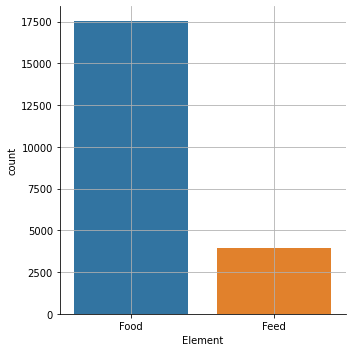

In [16]:
sns.catplot("Element", data=df_FAO_lastyears, kind="count")
plt.grid(True)
plt.show()

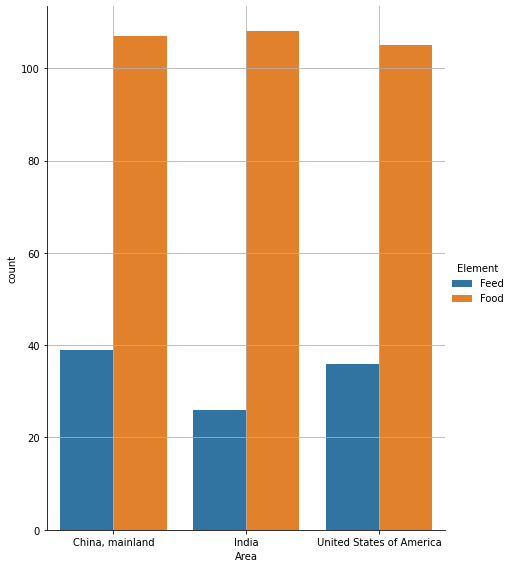

In [17]:
sns.catplot("Area", data=df_FAO_lastyears[(df_FAO_lastyears["Area"] == "India") | (df_FAO_lastyears["Area"] == "China, mainland") | (df_FAO_lastyears["Area"] == "United States of America")], kind="count", hue="Element", size=8, aspect=.8)
plt.grid(True)

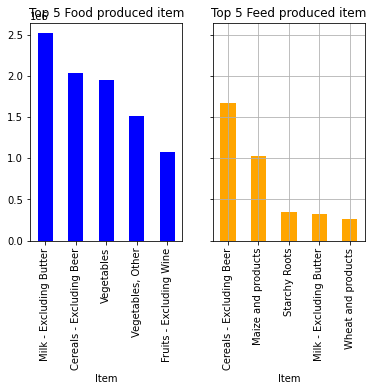

In [18]:
#Rank of most Produced Items 
df_item = df_FAO_lastyears.pivot_table(values=year_list, columns="Element",index=["Item"], aggfunc="sum")
df_item = df_item.T
#FOOD
df_food_item = df_item.xs("Food", level=1, axis=0)
df_food_item = df_food_item.sum(axis=0).sort_values(ascending=False).head()
#FEED
df_feed_item = df_item.xs("Feed", level=1, axis=0)
df_feed_item = df_feed_item.sum(axis=0).sort_values(ascending=False).head()
#Plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df_food_item.plot(kind="bar", title="Top 5 Food produced item", color="b", ax=ax1)
df_feed_item.plot(kind="bar", title="Top 5 Feed produced item", color="orange" , ax=ax2)
plt.grid(True)

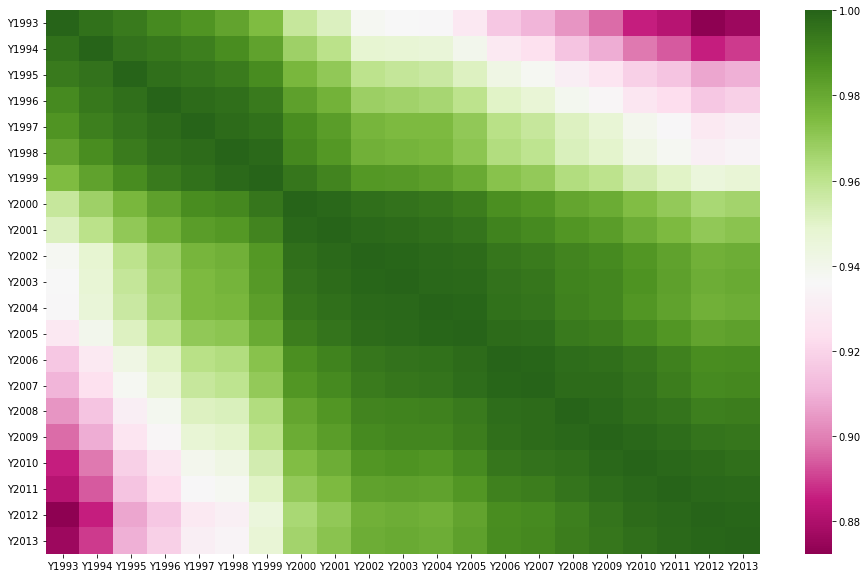

In [19]:
#Now, we plot a heatmap of correlation of production in different years
year_df = df_FAO_lastyears.iloc[:,4:].astype(float)
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_df.corr(), ax=ax, cmap="PiYG")

In [20]:
df_Food_Production.describe() 

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,27.000000,30.000000,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,52.033823,539.130695,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,17.855335,106.927557,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,55.297183,694.805356,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [21]:
df_Food_Production.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [22]:
df_Food_Production_info= pd.DataFrame({"Dtype": df_Food_Production.dtypes, "Unique": df_Food_Production.nunique(), "Missing%": (df_Food_Production.isnull().sum()/df_Food_Production.shape[0])*100})
df_Food_Production_info

,Dtype,Unique,Missing%
Food product,object,43,0.000000
Land use change,float64,21,0.000000
Animal Feed,float64,10,0.000000
Farm,float64,24,0.000000
Processing,float64,10,0.000000
Transport,float64,8,0.000000
Packging,float64,10,0.000000
Retail,float64,4,0.000000
Total_emissions,float64,33,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,33,23.255814


In [23]:
df_Food_Production = pd.read_csv("/content/Food_Production.csv",index_col = "Food product")

# Replace the columns headers having spaces in between the words
df_Food_Production.rename(columns = {"Land use change": "LandUseChange", 
                     "Animal feed": "AnimalFeed",
                     "Total_emissions": "TotalEmissions"}, 
            inplace = True)

# Replace the NaN with 0
df_Food_Production = df_Food_Production.fillna(0)

df_Food_Production.head()

,LandUseChange,Animal Feed,Farm,Processing,Transport,Packging,Retail,TotalEmissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
Food product,,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [24]:
df_Food_Production["TotalEmissions"].describe(include = "all")

count    43.000000
mean      5.972093
std      10.501753
min       0.200000
25%       0.850000
50%       1.600000
75%       6.000000
max      59.600000
Name: TotalEmissions, dtype: float64

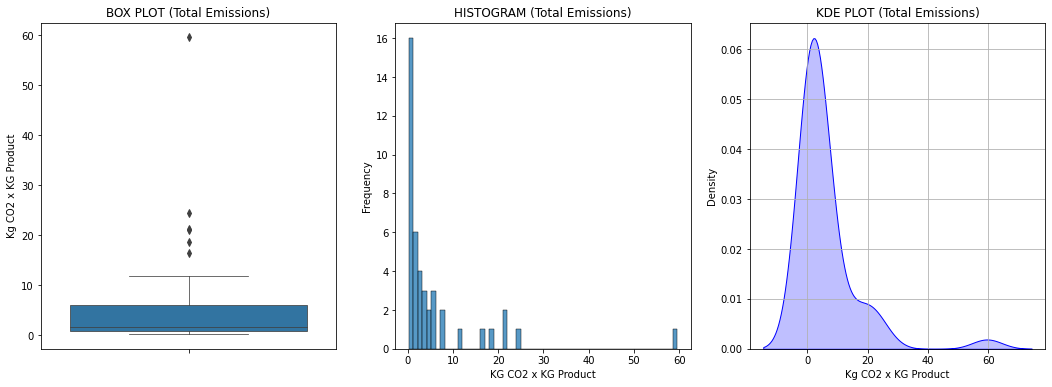

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(131)

box = sns.boxplot(y = "TotalEmissions", data=df_Food_Production, orient = "v", linewidth=0.75)

box.set_ylabel("Kg CO2 x KG Product",fontsize = 10)
box.set_title("BOX PLOT (Total Emissions)")

plt.subplot(132)

hist = sns.histplot(df_Food_Production["TotalEmissions"], bins = 60)

hist.set_title("HISTOGRAM (Total Emissions)")
hist.set_xlabel("KG CO2 x KG Product",fontsize = 10)
hist.set_ylabel("Frequency",fontsize = 10)

plt.subplot(133)

kde = sns.kdeplot(df_Food_Production["TotalEmissions"],
                   shade = True,
                   color = "b")

kde.set_title("KDE PLOT (Total Emissions)")
kde.set_xlabel("Kg CO2 x KG Product",fontsize = 10)
kde.set_ylabel("Density",fontsize = 10)
plt.grid(True)
plt.show()

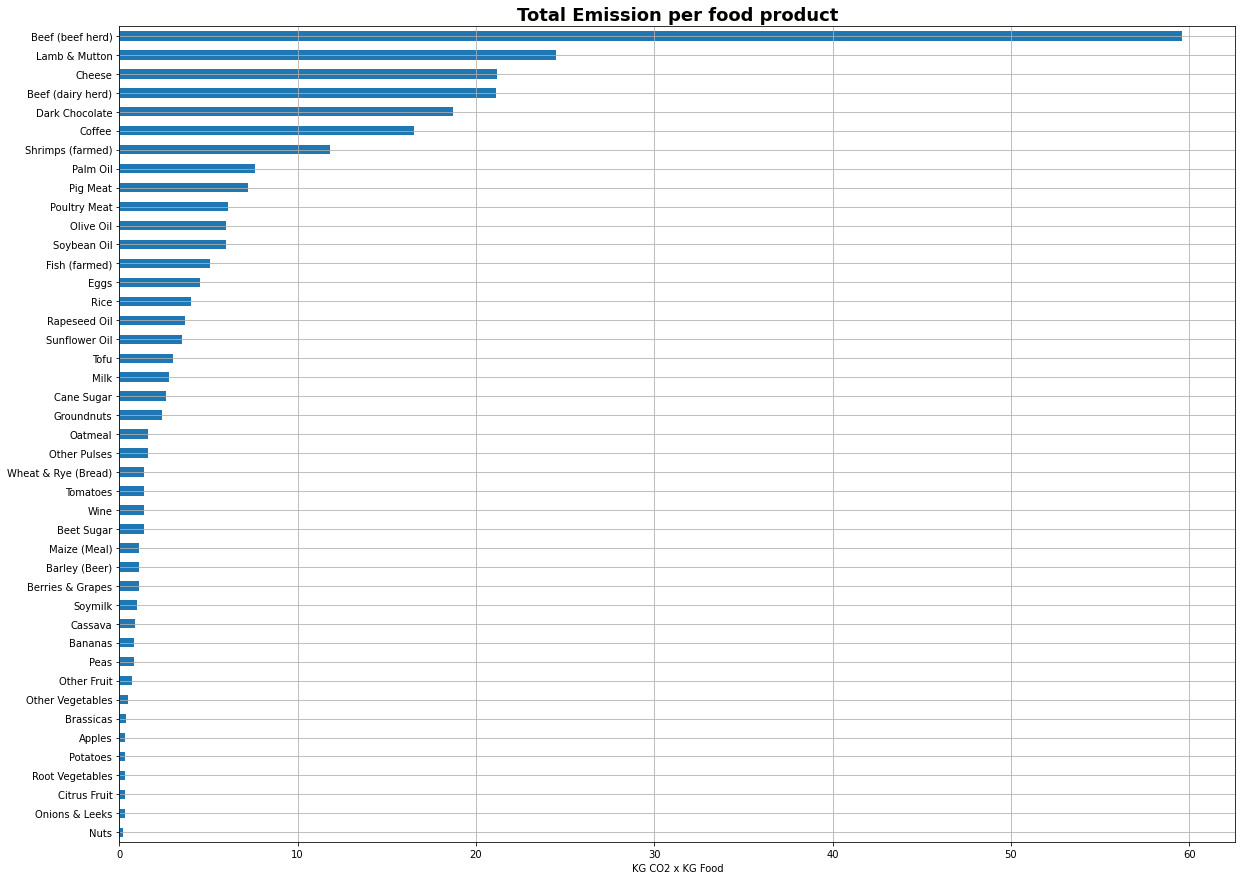

In [26]:
df_Food_Production= df_Food_Production.sort_values(["TotalEmissions"])

plt.subplots(figsize = (20,15))

df_Food_Production.TotalEmissions.plot(kind = "barh")

plt.title("Total Emission per food product",fontsize = 18, fontweight = "bold")
plt.xlabel("KG CO2 x KG Food",fontsize = 10)
plt.ylabel("")
plt.grid(True)
plt.show()

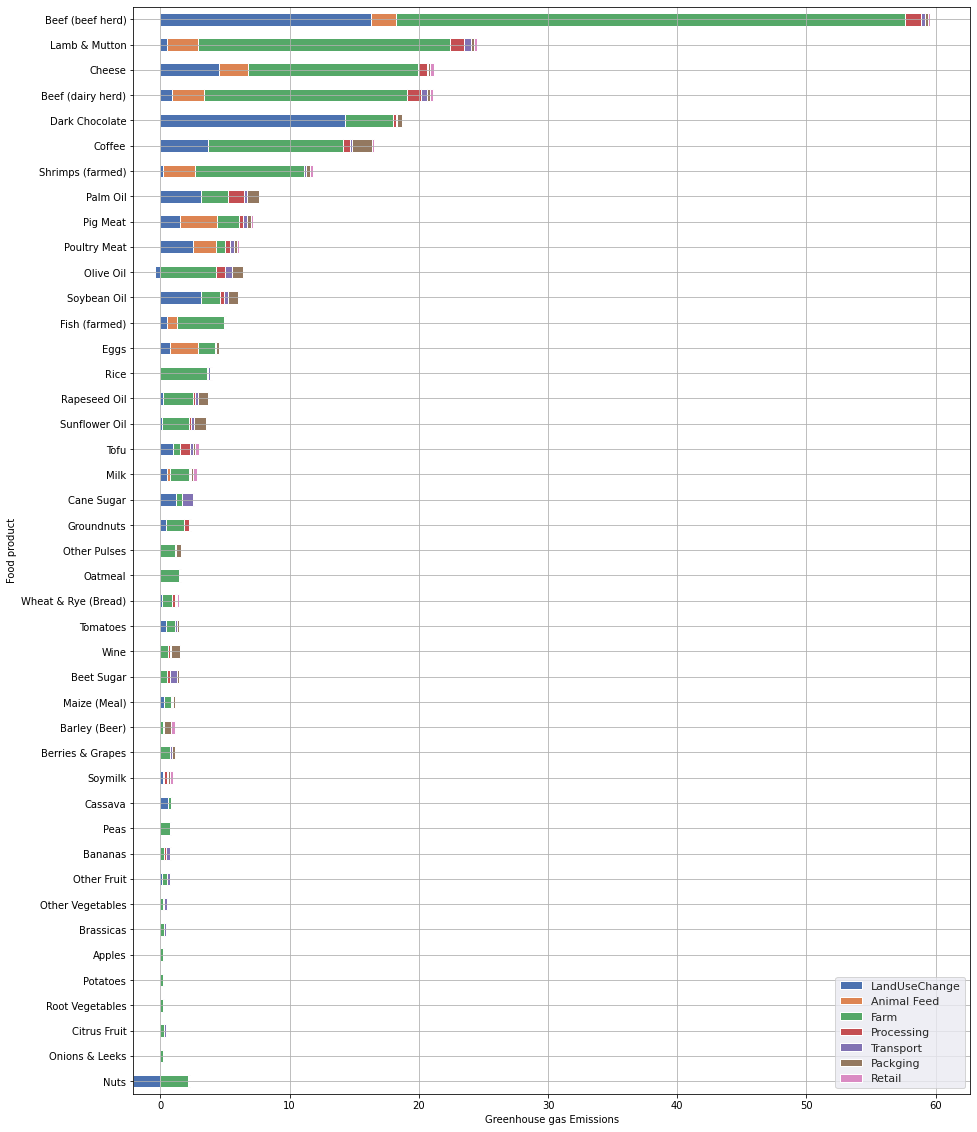

In [27]:
df_Food_Production.reset_index(inplace=True)
temp_df= df_Food_Production.sort_values(by= "TotalEmissions", ascending= True).iloc[:,:8]

fig, ax = plt.subplots(figsize=(15,20))
sns.set()
temp_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.grid(True)
plt.show()

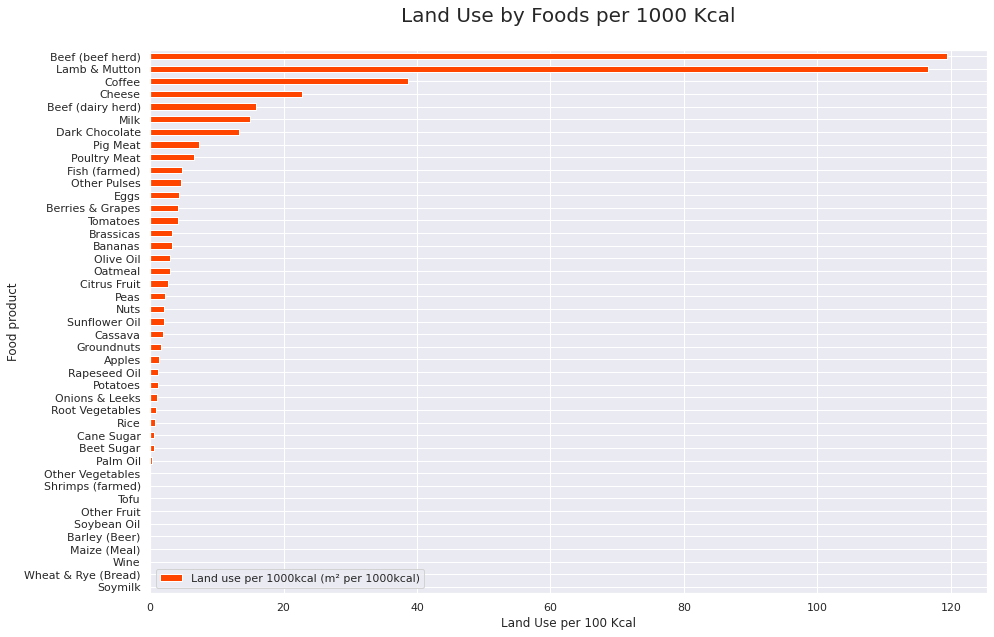

In [28]:
# comparing different foods by land use per 1000Kcal
land_df= df_Food_Production.dropna().sort_values(by= "Land use per 1000kcal (m² per 1000kcal)", ascending= True)[["Food product","Land use per 1000kcal (m² per 1000kcal)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "orangered")
plt.xlabel("Land Use per 100 Kcal")
plt.title("Land Use by Foods per 1000 Kcal\n", size= 20)
plt.grid(True)
plt.show()

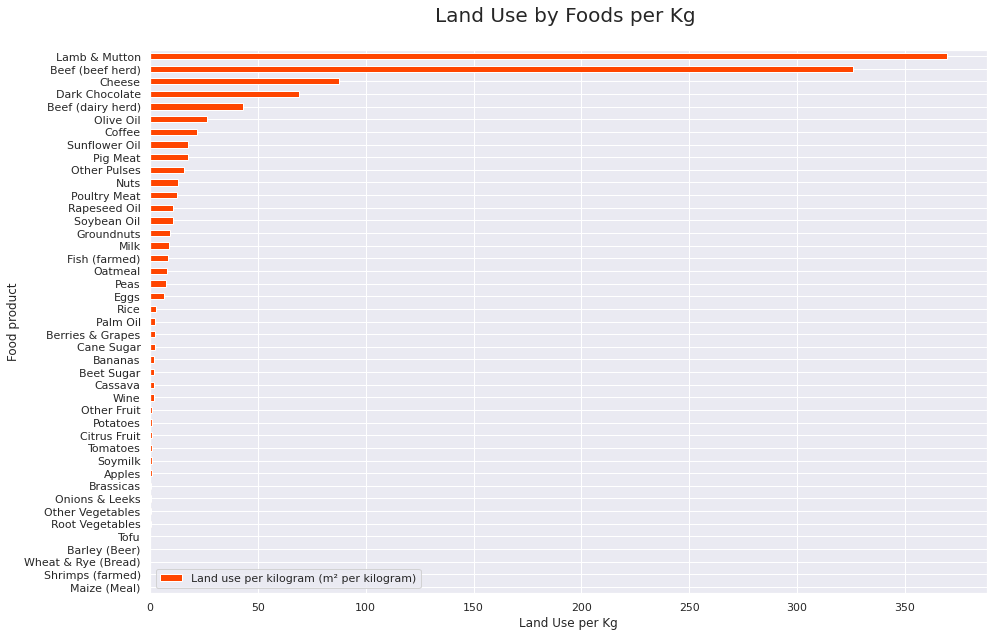

In [29]:
# comparing different foods by land use per kg
land_df= df_Food_Production.dropna().sort_values(by= "Land use per kilogram (m² per kilogram)", ascending= True)[["Food product","Land use per kilogram (m² per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "orangered")
plt.xlabel("Land Use per Kg")
plt.title("Land Use by Foods per Kg \n", size= 20)
plt.grid(True)
plt.show()

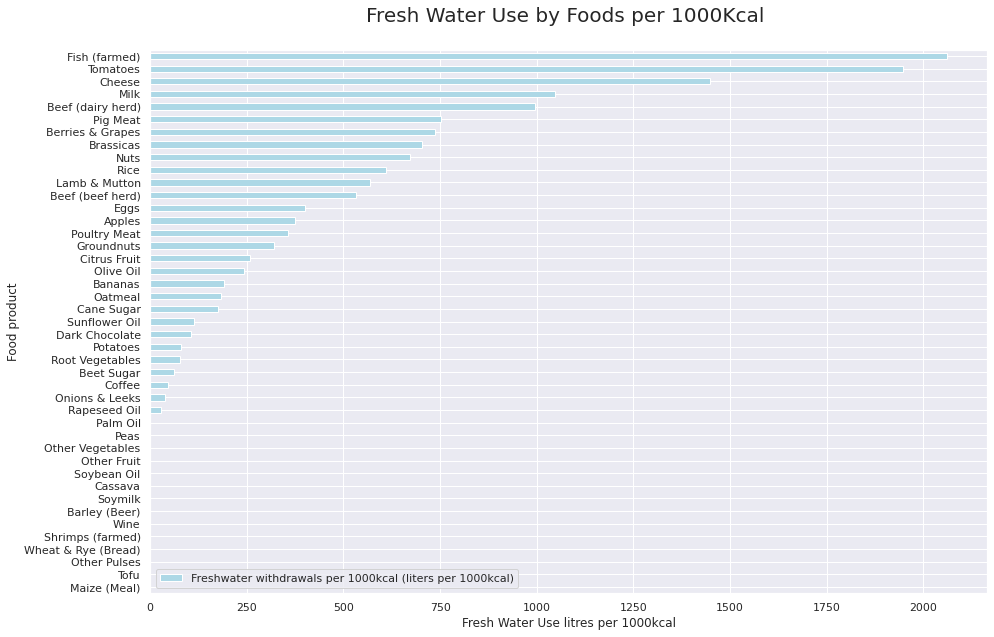

In [30]:
# comparing different foods by fresh water per 1000Kcal
water_df= df_Food_Production.dropna().sort_values(by= "Freshwater withdrawals per 1000kcal (liters per 1000kcal)", ascending= True)[["Food product","Freshwater withdrawals per 1000kcal (liters per 1000kcal)"]]


fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per 1000kcal")
plt.title("Fresh Water Use by Foods per 1000Kcal \n", size= 20)
plt.grid(True)
plt.show()

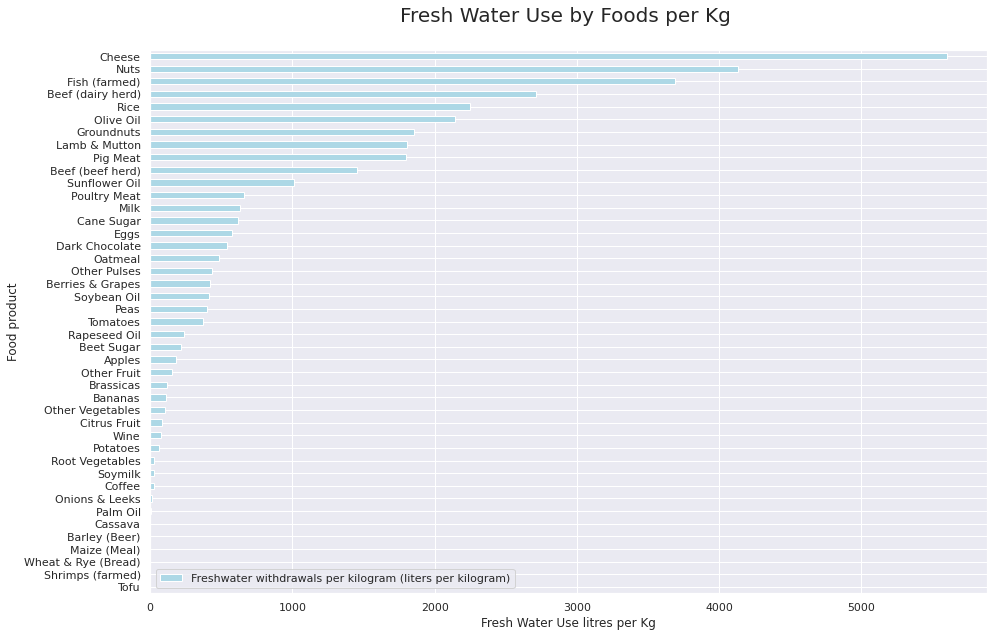

In [31]:
# comparing different foods by fresh water per kg
water_df= df_Food_Production.dropna().sort_values(by= "Freshwater withdrawals per kilogram (liters per kilogram)", ascending= True)[["Food product","Freshwater withdrawals per kilogram (liters per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per Kg")
plt.title("Fresh Water Use by Foods per Kg \n", size= 20)
plt.grid(True)
plt.show()

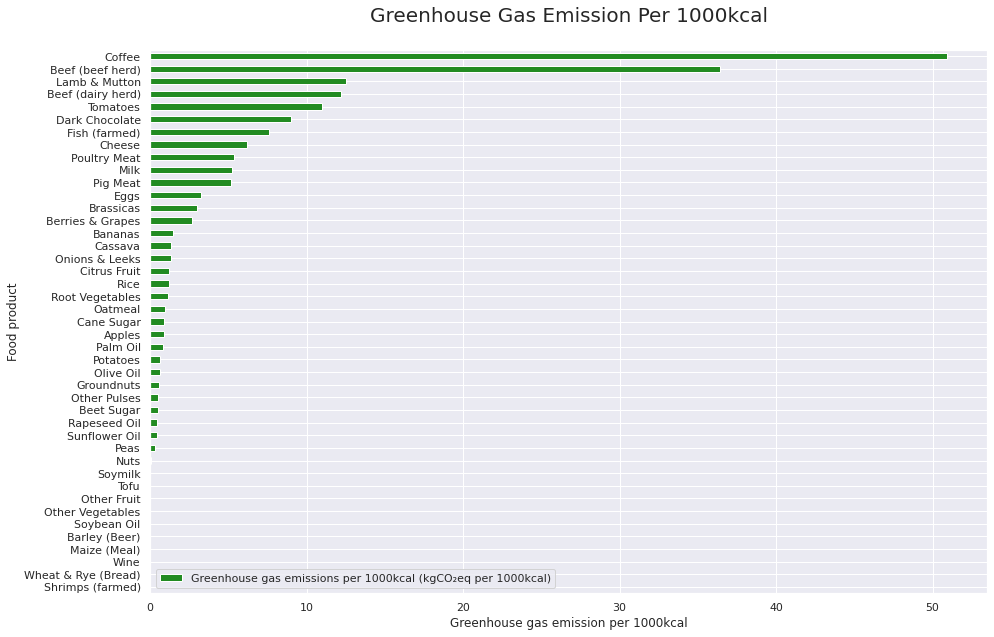

In [32]:
# comparing different foods by greenhouse gas emission per 1000Kcal
emission_df= df_Food_Production.dropna().sort_values(by= "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)", ascending= True)[["Food product","Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "forestgreen")
plt.xlabel("Greenhouse gas emission per 1000kcal")
plt.title("Greenhouse Gas Emission Per 1000kcal\n", size= 20)
plt.grid(True)
plt.show()

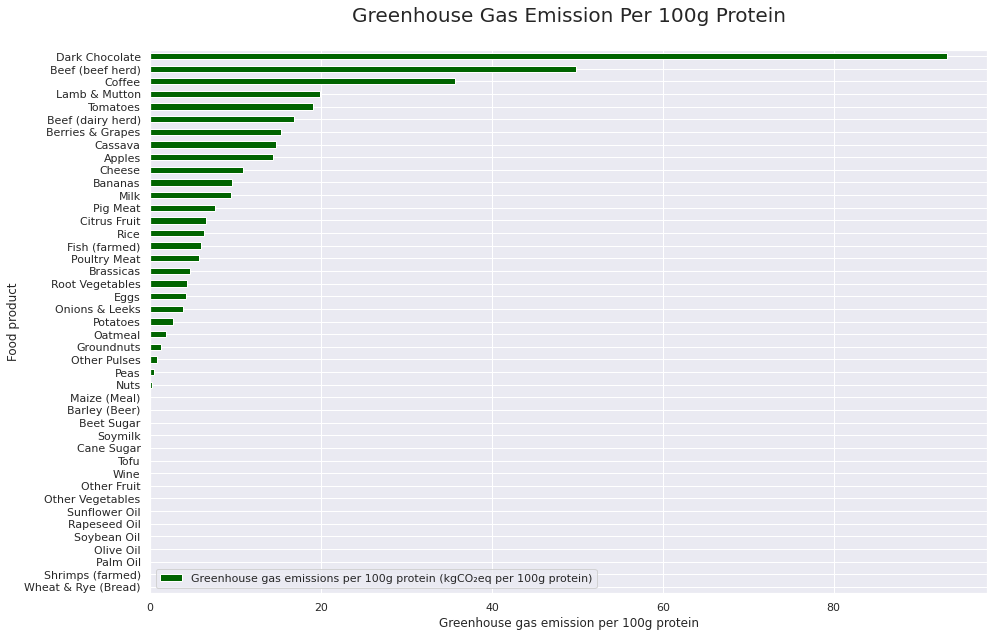

In [33]:
# comparing different foods by greenhouse gas emission per 100g protein
emission_df= df_Food_Production.dropna().sort_values(by= "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)", ascending= True)[["Food product","Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 100g protein")
plt.title("Greenhouse Gas Emission Per 100g Protein\n", size= 20)
plt.grid(True)
plt.show()

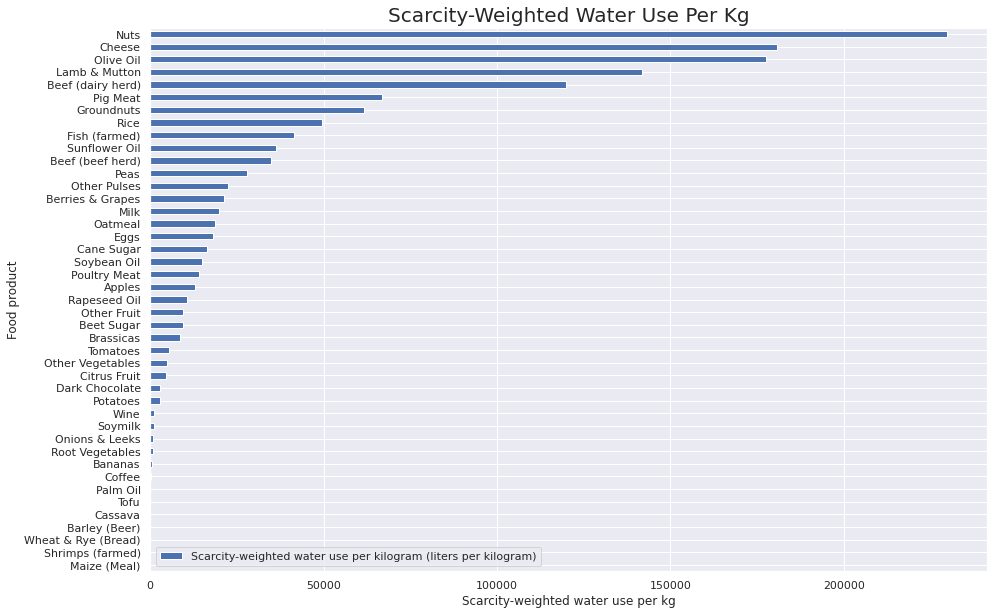

In [34]:
# comparing different foods by scarcity-weighted water required to produce 1 kg food
scarcity_df= df_Food_Production.dropna().sort_values(by= "Scarcity-weighted water use per kilogram (liters per kilogram)", ascending= True)[["Food product","Scarcity-weighted water use per kilogram (liters per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax)
plt.xlabel("Scarcity-weighted water use per kg")
plt.title("Scarcity-Weighted Water Use Per Kg", size= 20)
plt.grid(True)
plt.show()

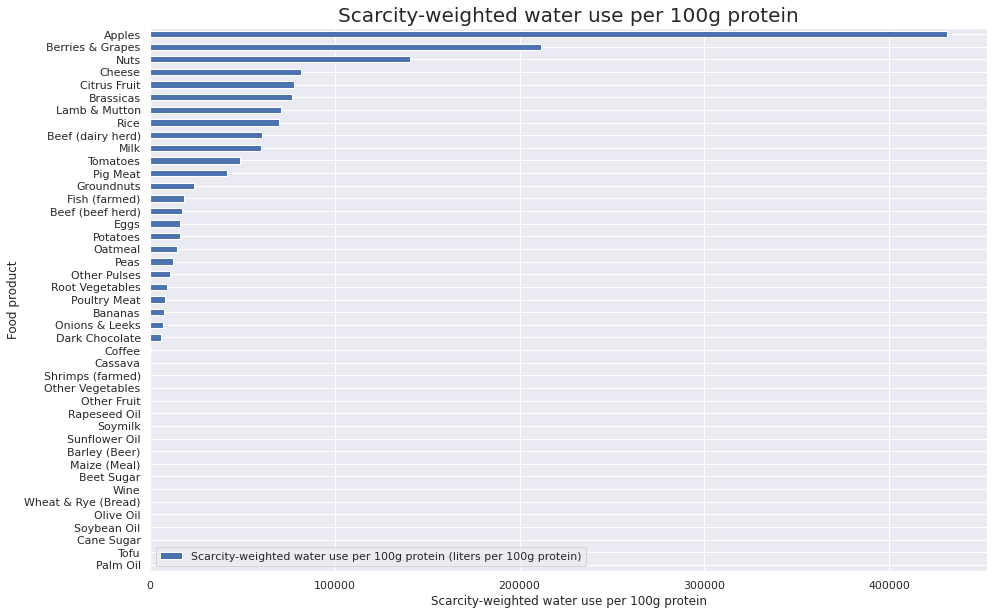

In [35]:
# comparing different foods by scarcity-weighted water in terms of nutritional values
scarcity_df= df_Food_Production.dropna().sort_values(by= 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', ascending= True)[['Food product',
       'Scarcity-weighted water use per 100g protein (liters per 100g protein)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
scarcity_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel('Scarcity-weighted water use per 100g protein')
plt.title('Scarcity-weighted water use per 100g protein', size= 20)
plt.grid(True)
plt.show()

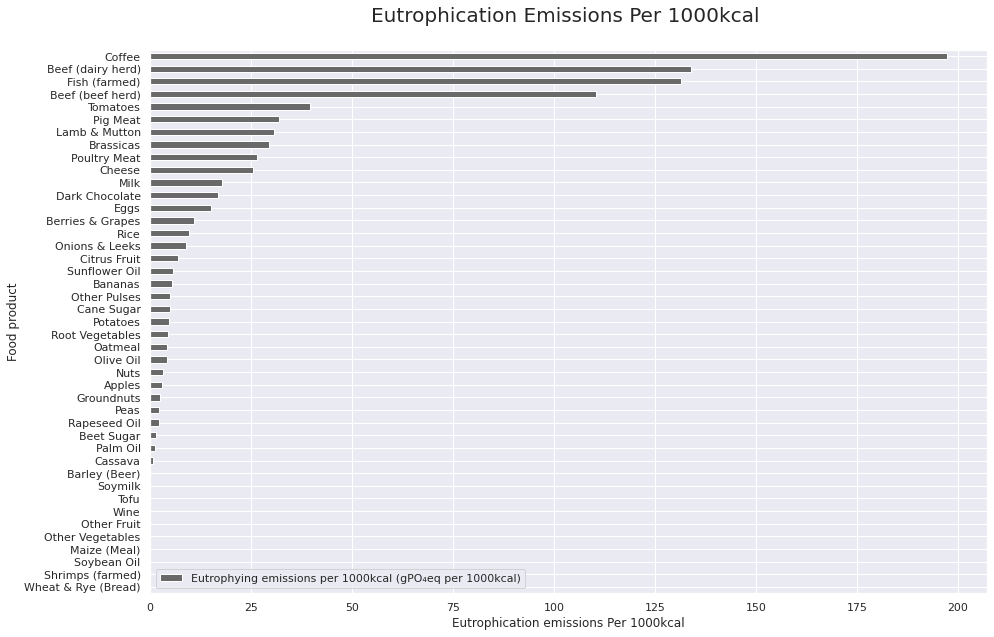

In [36]:
#comparing eutrophication emissions per 1000kcal
eutrophication_df= df_Food_Production.dropna().sort_values(by= "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)", ascending= True)[["Food product","Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "dimgray")
plt.xlabel("Eutrophication emissions Per 1000kcal")
plt.title("Eutrophication Emissions Per 1000kcal \n", size= 20)
plt.grid(True)
plt.show()

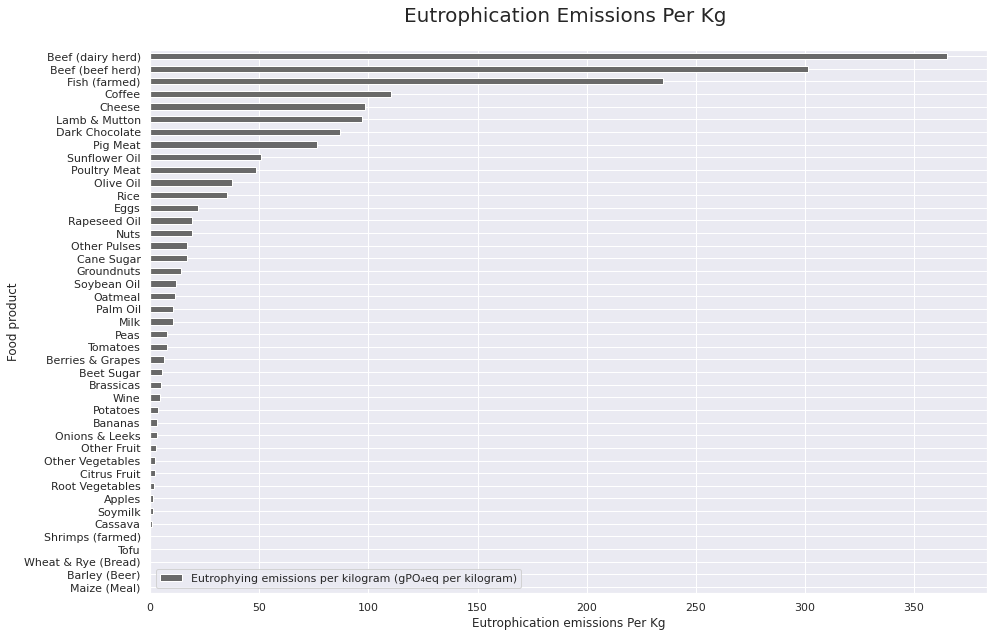

In [37]:
#comparing eutrophication emissions of different foods required to produce 1 kg food
eutrophication_df= df_Food_Production.dropna().sort_values(by= "Eutrophying emissions per kilogram (gPO₄eq per kilogram)", ascending= True)[["Food product","Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index("Food product").plot(kind="barh", stacked=True, ax= ax, color= "dimgray")
plt.xlabel("Eutrophication emissions Per Kg")
plt.title("Eutrophication Emissions Per Kg \n", size= 20)
plt.grid(True)
plt.show()

In [38]:
#modify the dataset by erasing many columns and renaming others in order to simplify this analysis
df_Food_Production.set_index("Food product", inplace=True)

columns_to_delete = ["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)",
                    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)",
                    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)",
                    "Freshwater withdrawals per 100g protein (liters per 100g protein)",
                    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)",
                    "Land use per 1000kcal (m² per 1000kcal)",
                    "Land use per 100g protein (m² per 100g protein)",
                    "Scarcity-weighted water use per 100g protein (liters per 100g protein)",
                    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"]

df_Food_Production = df_Food_Production.drop(columns=columns_to_delete)

# Replace the columns headers with a very long name with a shorter name
df_Food_Production.rename(columns = {"Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "EutrophyingEmissions",
                     "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshwaterWithdrawals",
                     "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseGasEmissions",
                     "Land use per kilogram (m² per kilogram)": "LandUse",
                     "Scarcity-weighted water use per kilogram (liters per kilogram)": "ScarcityWeightedWaterUse"}, 
          inplace = True)

df_stat = df_Food_Production.loc[:, "TotalEmissions" : "ScarcityWeightedWaterUse"]
df_stat.head()

,TotalEmissions,EutrophyingEmissions,FreshwaterWithdrawals,GreenhouseGasEmissions,LandUse,ScarcityWeightedWaterUse
Food product,,,,,,
Nuts,0.2,19.15,4133.8,0.069919,12.96,229889.8
Onions & Leeks,0.3,3.24,14.3,1.351351,0.39,932.0
Citrus Fruit,0.3,2.24,82.7,1.218750,0.86,4662.7
Root Vegetables,0.3,1.61,28.4,1.162162,0.33,929.2
Potatoes,0.3,3.48,59.1,0.628415,0.88,2754.2


In [39]:
df_stat.corr()

,TotalEmissions,EutrophyingEmissions,FreshwaterWithdrawals,GreenhouseGasEmissions,LandUse,ScarcityWeightedWaterUse
TotalEmissions,1.000000,0.751377,0.334524,0.699204,0.824595,0.268910
EutrophyingEmissions,0.751377,1.000000,0.522032,0.595589,0.522653,0.345495
FreshwaterWithdrawals,0.334524,0.522032,1.000000,0.110238,0.287596,0.855976
GreenhouseGasEmissions,0.699204,0.595589,0.110238,1.000000,0.498148,0.045816
LandUse,0.824595,0.522653,0.287596,0.498148,1.000000,0.358504
ScarcityWeightedWaterUse,0.268910,0.345495,0.855976,0.045816,0.358504,1.000000


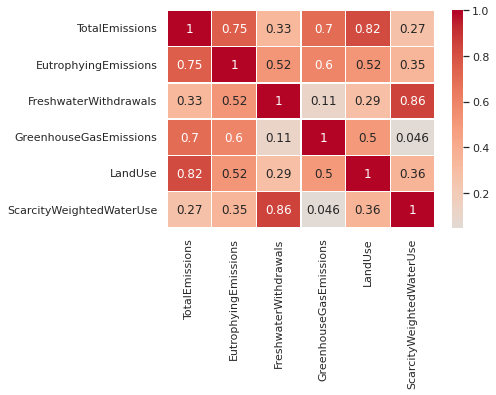

In [40]:
ax = sns.heatmap(df_stat.corr(),center=0, linewidths=.5, annot=True, cmap="coolwarm")

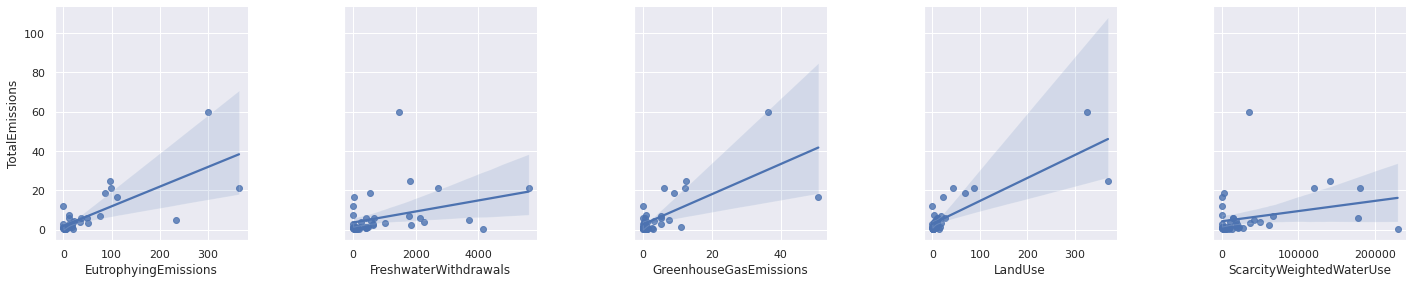

In [41]:
pairplot = sns.pairplot(df_stat,
                        height = 4,
                        aspect = 1,
                        
                        x_vars = ["EutrophyingEmissions","FreshwaterWithdrawals", 
                                  "GreenhouseGasEmissions", "LandUse",
                                  "ScarcityWeightedWaterUse"],
                        
                        y_vars = ["TotalEmissions"],
                        
                        kind = "reg")

pairplot.fig.subplots_adjust(wspace = 0.5 , hspace = 0.1)
plt.grid(True)
plt.show()

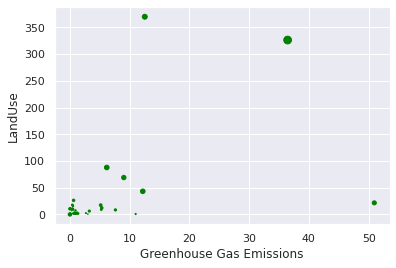

In [42]:
plt.scatter(x = df_Food_Production["GreenhouseGasEmissions"],
            y = df_Food_Production["LandUse"], 
            color="green", 
            marker="o", 
            s=df_Food_Production["TotalEmissions"])
plt.xlabel("Greenhouse Gas Emissions")
plt.ylabel("LandUse")
plt.grid(True)
plt.show()